<a href="https://colab.research.google.com/github/Sameervasudev/Capstone_Project_Hotel_Booking/blob/main/Sameer_Talashilkar_%7C_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.


.


**Things we'll be doing.**

**Understnding the problem : We'll look at each variable and we can conclude which variable will help us to analyse this dataset.**

**Exploring unique and missing values.**

**Dealing with missing values**

**Plot the graphs and charts to get some insights about the dataset.** 

In [ ]:
#importing important libraries for the EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project - Hotel Data Analysis/Hotel Bookings.csv') #reading CSV file

In [ ]:
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.describe() #checking the summary statistics 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.shape #checking for the shape of dataset

(119390, 32)

We have total of 119390 rows and 32 columns.


In [ ]:
df.info() #fetching information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Looking for and handling NaN/ Null/ Missing Values and Outliers

In [ ]:
df.isna().sum().sort_values(ascending = False) #Check if our data contains any missing values in descending order

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

We can drop 'company' column as it contains too many missing values.



In [ ]:
df.drop( axis=1, columns=['company'] ,inplace=True) #dropped company column because it has too many missing values


In Children column we have 4 missing values, so we are filling those missing values with average value of children column and we are type-casting float values to integer value.

In [13]:
df['children'].fillna(round(df['children'].mean()),inplace=True) #replacing all the missing values with the rounded mean value.
df['children']= df['children'].apply(lambda x : int(x)) 

In agent column, we have 16340 missing values, so we are replacing those values with 'unknown'. Also we are typecasting the ID of Agent to integer values.

In [14]:
df['agent'].fillna(0, inplace=True)
df['agent']= df['agent'].apply(lambda x : int(x))
df['agent']= df['agent'].apply(lambda x : 'unknown' if x==0 else x) #replacing all the missing values with 'unknown'.

We are dropping the rows where the sum of adults, children and babies are equal to 0.

In [15]:
df = df.drop(df[(df['adults']+df['children']+df['babies'])==0].index) #dropping the rows where the sum of adult,children and babies is 0.




Checking for outliers in average daily rate (adr) column.

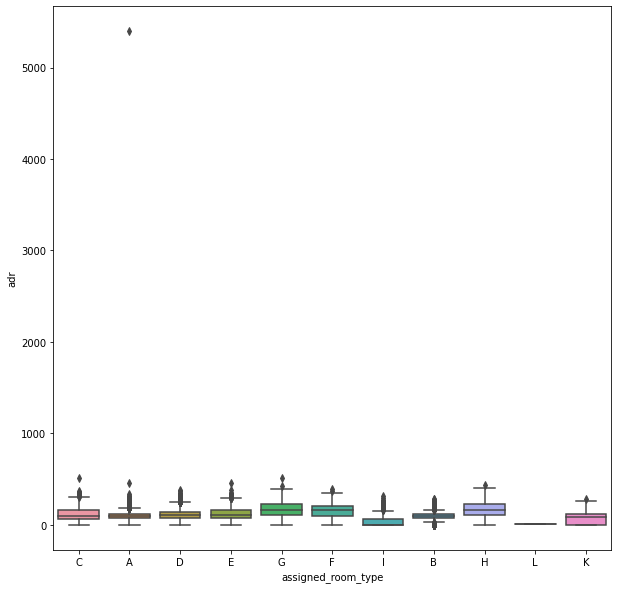

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df['adr'],x=df['assigned_room_type'])

Removing outlier data from datset where adr is greater than 1000.

In [17]:
df=df.drop(df[df['adr']>1000].index) #dropping the row where the average daily rate per person is more than 1000.

In [18]:
df=df.drop(df[df['adr']<0].index) #ropping the row where the average daily rate per person is less than 0.


Things we have done till now is:
Checked Head and Tail of the dataset.
Analysed summary statistics of the dataset.
Looked for NaN/ Null/ Missing Values.
Filled missing values.
Analysed for Outliers and removed Outliers.

**Now Let's try to find out the solutions for the below question.**
What is the percentage of booking done in different hotels? 
How many total bookings done in different Years?
How many total bookings done in different months?
Total Number of Booking Cancelled in different months?
Total Number of Non-Cancelled Bookings in different months?

##1. Plots of type of hotels and their booking

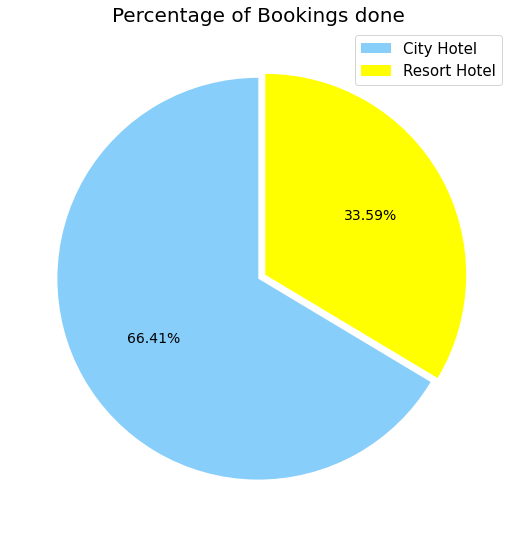

In [19]:
#Pie-Chart for the percentage of bookings done in different types of Hotels.
plt.figure(figsize=(9,10))
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.04)
colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, colors=colors,autopct='%1.2f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of Bookings done', fontsize=20)
plt.legend(labels,loc=1, prop = {'size' : 15})

Conclusion: From the above Pie-Chart, we can conclude that 66.41 % of booking done in City Hotel and 33.59 % of booking done in Resort Hotel.

#2. Plot Year wise bookings in Hotel

Text(0, 0.5, 'Number of Bookings')

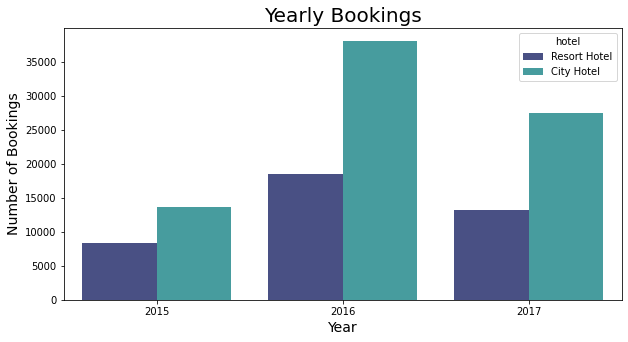

In [20]:
#Countplot for Number of bookings done in 2015, 2016 and 2017 in different type of hotels
plt.figure(figsize=(10,5))
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel', palette='mako').set_title ('Yearly Bookings', fontsize = 20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)

 We can see that, In year 2016 most bookings have been made in City Hotel and Resort Hotel.
 

#3. Plot of Month wise Hotel Booking

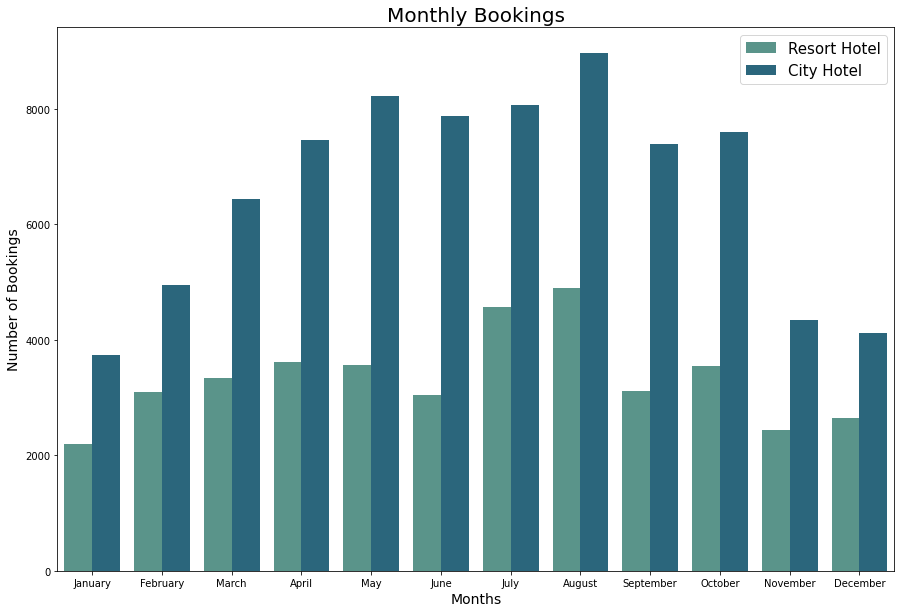

In [21]:
#countplot for total monthly booking in different type of hotels
plt.figure(figsize = (15, 10))
sns.countplot(x=df['arrival_date_month'], hue=df['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='crest').set_title ('Monthly Bookings',fontsize=20)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(prop={'size':15})

Most of the bookings done in the Month of August in Resort Hotel and City Hotel.

# 4. Plot of Monthly cancelled.

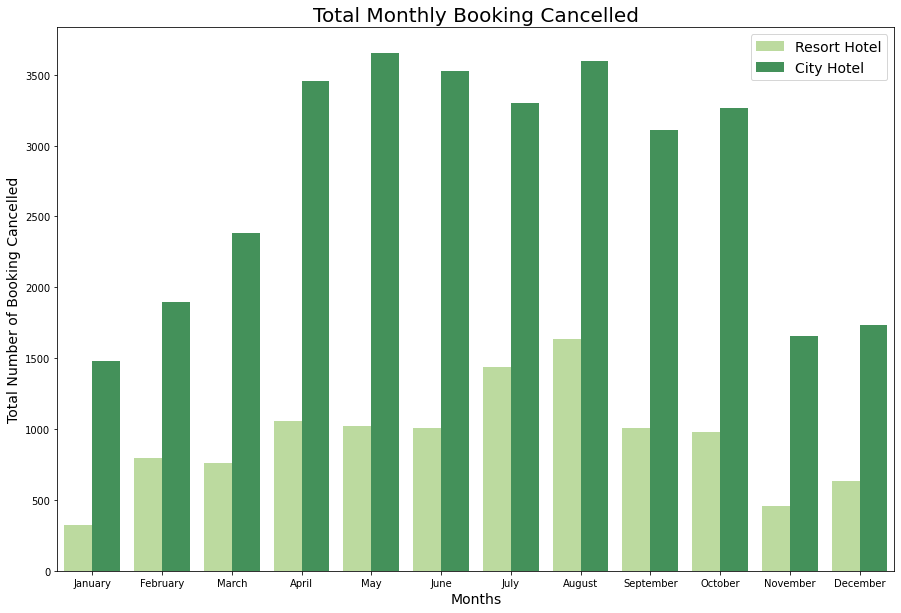

In [22]:
#Countplot of Total number of booking Cancelled month wise 
df1=df[df['is_canceled']==1]
plt.figure(figsize = (15, 10))
sns.countplot(x=df1['arrival_date_month'], hue=df1['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='YlGn').set_title ('Total Monthly Booking Cancelled',fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Booking Cancelled',fontsize=14)
plt.legend(prop={'size':14})

In May, most of the bookings are cancelled in City Hotel and In August most of the cancellation done in Resort Hotel.

#5. Plot of Monthly Actual Booking.

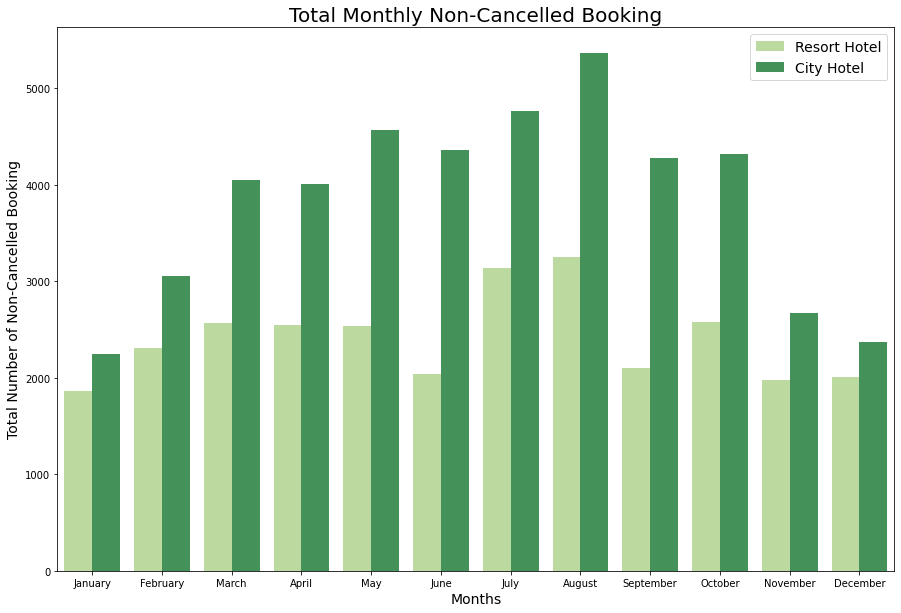

In [23]:
#Countplot for Monthly Non-Cancelled Booking
df2=df[df['is_canceled']==0]
plt.figure(figsize = (15, 10))
sns.countplot(x=df2['arrival_date_month'], hue=df2['hotel'], order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'],palette='YlGn').set_title ('Total Monthly Non-Cancelled Booking',fontsize=20)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Number of Non-Cancelled Booking',fontsize=14)
plt.legend(prop={'size':14})

 Maximum number of Booking done in August in City Hotel and Resort Hotel that are Not-Cancelled.

6 How many days customers prefer to stay in week night?

7 How many days customers prefer to stay in weekend night?

8 what is the most preferred meal type by customers?

9 How many customers are making pecial Request?

10 Which one is most preferred room type?